This Notebook is meant to generate a platon eclipse depth spectrum.
The output of platon will then be used as input into pandexo.

In [1]:
# Imports
from platon.TP_profile import Profile
from platon.eclipse_depth_calculator import EclipseDepthCalculator
import matplotlib.pyplot as plt
import numpy as np

import warnings
#warnings.filterwarnings('ignore')
import pandexo.engine.justdoit as jdi # THIS IS THE HOLY GRAIL OF PANDEXO

import pandexo.engine.justplotit as jpi
import pickle as pk



In [2]:
# Constants
from platon.constants import M_jup, R_jup, R_sun, M_earth, M_sun, AU

# Location of the data folder in which all output will be saved.
datapath = "/home/noud333/bachelorproject/data"


planet_temp = 667           # In K

# name of the files of current run.
filename = f"V1298TauB_NIRSPECH_radiative"

# Title of the plot
pandexo_title = 'V1298Tau B'

blackbody = True
full_output_platon = False

# Constants only for Platon

star_temp = 4970            # In K
Rstar = 1.305 * R_sun
Rplanet = 0.916 * R_jup
Mplanet = 21 * M_earth
a = 0.1688 * AU



# Constants only for Pandexo
transit_duration = 6.42 * 60 * 60 # in seconds
star_magnitude = 8.687
metalicity = 0.1387
logg = 4.246
ref_wave = 1.25         #For J mag = 1.25, H = 1.6, K =2.22.. etc (all in micron)

# List of instruments you want to run. Total list:
# ['WFC3 G141', 'MIRI LRS', 'NIRISS SOSS', 'NIRSpec G140M', 'NIRSpec G140H', 'NIRSpec G235M', 'NIRSpec G235H',
#  'NIRSpec G395M', 'NIRSpec G395H', 'NIRSpec Prism', 'NIRCam F322W2', 'NIRCam F444W']

inst_list = ['NIRSpec G140M', 'NIRSpec G235M', 'NIRSpec G395M']
inst_list = ['NIRSpec G140H', 'NIRSpec G235H', 'NIRSpec G395H']
# inst_list = ['MIRI LRS']

# Pandexo visualisation constants

pandexo_R = 20          # amount of bins
pandexo_num_tran = 1     # number of transits
pandexo_model = False
pandexo_x_range = [.8,5.2] # in micron
# pandexo_x_range = [5,14]

# Basic test values for platon with a jupiter like planet around a sunlike star:
# planet_temp = 500
# star_temp = 5778
# Rstar = R_sun
# Rplanet = R_jup
# Mplanet = M_jup
# a = 0.05* au


Use the constants above to generate eclipse depth for planet star combo.\
The planet is assumed to be isothermal.\
\
Output files will be a plot saved under filename in the folder "data/platon/"\
The output will be a png and a txt file.

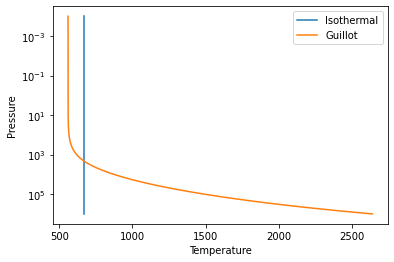

In [3]:
p_1 = Profile(max_P=1e6)
p_1.set_isothermal(planet_temp)

p_2 = Profile(max_P=1e6)
p_2.set_from_radiative_solution(T_star= star_temp, Rs= Rstar, a= a, Mp= Mplanet, Rp= Rplanet, beta= 1, log_k_th= 0.1, log_gamma= 10, log_gamma2= 1, alpha=0, T_int= 100)

plt.plot(p_1.temperatures, p_1.pressures, label="Isothermal")
plt.plot(p_2.temperatures, p_2.pressures, label="Guillot")
plt.xlabel("Temperature")
plt.ylabel("Pressure")
plt.yscale('log')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

#print(np.load("/home/noud333/anaconda3/envs/bp/lib/python3.6/site-packages/platon/data/temperatures.npy"))

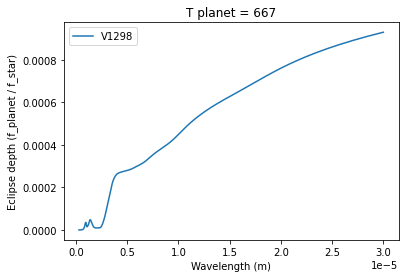

In [4]:
p = Profile(max_P=1e6)
p_iso = Profile()

p_iso.set_isothermal(planet_temp)
p.set_from_radiative_solution(T_star= star_temp, Rs= Rstar, a= a, Mp= Mplanet, Rp= Rplanet, beta= 1, log_k_th= 0, log_gamma= 1, log_gamma2= 1, alpha=0, T_int= 100)


calc = EclipseDepthCalculator(method="xsec") #"ktables" for correlated k

if full_output_platon:
    wavelengths, depths, info_dict = calc.compute_depths(t_p_profile = p, star_radius = Rstar, planet_mass = Mplanet, planet_radius = Rplanet, T_star = star_temp, stellar_blackbody = blackbody, full_output = True, add_gas_absorption=False)
    wavelengths_iso, depths_iso, info_dict_iso = calc.compute_depths(t_p_profile = p_iso, star_radius = Rstar, planet_mass = Mplanet, planet_radius = Rplanet, T_star = star_temp, stellar_blackbody = blackbody, full_output = True, add_gas_absorption=False)
else:
    wavelengths, depths = calc.compute_depths(t_p_profile = p, star_radius = Rstar, planet_mass = Mplanet, planet_radius = Rplanet, T_star = star_temp, stellar_blackbody = blackbody, add_gas_absorption = False)
    wavelengths_iso, depths_iso = calc.compute_depths(t_p_profile = p_iso, star_radius = Rstar, planet_mass = Mplanet, planet_radius = Rplanet, T_star = star_temp, stellar_blackbody = blackbody, add_gas_absorption = False)

#plt.plot(wavelengths, info_dict['stellar_spectrum'], label='stellar')
#plt.plot(wavelengths, info_dict['planet_spectrum'], label='planet')

# test_depths = []
# for i in range(len(info_dict['stellar_spectrum'])):
#     test_depths.append((info_dict['planet_spectrum'][i]*np.pi*0.5*((Rplanet/1000)**2))/info_dict['stellar_spectrum'][i])

#plt.plot(wavelengths, test_depths)

#plt.xscale('log')
#plt.yscale('log')

# Generate picture
plt.plot(wavelengths, depths, label="V1298")

#plt.ylim(depths[0]/2, max(depths))

# wavelengths, depths = calc.compute_depths(t_p_profile = p, star_radius = Rstar, planet_mass = Mplanet, planet_radius = Rplanet, T_star = star_temp, stellar_blackbody = blackbody, add_gas_absorption=False)

# plt.plot(wavelengths, depths, label="V1298 no gas absorption")

# wavelengths, depths = calc.compute_depths(t_p_profile = p, star_radius = Rstar, planet_mass = M_jup, planet_radius = Rplanet, T_star = star_temp, stellar_blackbody = blackbody)

# plt.plot(wavelengths, depths, label= "Jupiter")

# wavelengths, depths = calc.compute_depths(t_p_profile = p, star_radius = Rstar, planet_mass = M_sun, planet_radius = Rplanet, T_star = star_temp, stellar_blackbody = blackbody)

# plt.plot(wavelengths, depths, label= "Sun")

plt.legend()

#plt.ylim(1e21, 1e22)
plt.title(f'T planet = {planet_temp}')
plt.xlabel('Wavelength (m)')
plt.ylabel('Eclipse depth (f_planet / f_star)')
#plt.ylabel('flux')

#plt.savefig(f"{datapath}/platon/{filename}.png")
plt.show()

# print(info_dict)

# change values of wavelengths and depths into numpy array
# correct wavelength value to unit pandexo can use
wavelengths_test = wavelengths
wavelengths = np.array(wavelengths) * 100
depths = np.array(depths)

data = np.column_stack([wavelengths, depths])
datafile_path = f'{datapath}/platon/{filename}.txt'
np.savetxt(datafile_path, data, fmt=['%2.10f','%2.45f'])


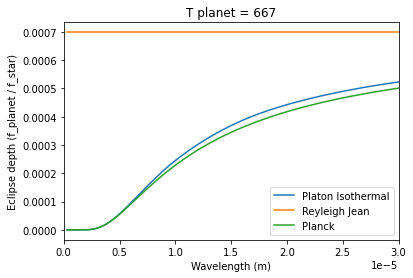

In [12]:
# control values

h = 6.626 * 10**(-34)
c = 2.997 * 10**(8)
kb = 1.38 * 10**(-23)

jr = (planet_temp/star_temp) * ((Rplanet**2)/(Rstar**2))
jr = (planet_temp * Rplanet**2)/(star_temp * Rstar**2)
jean_reyleigh = []
blackbody = []

d_wavelength = wavelengths_test[-1] - wavelengths_test[-2]

new_set = np.arange(wavelengths_test[0], 50 * 10**(-5), d_wavelength)

for wavelength in new_set:
    jean_reyleigh.append(jr)
    blackbody.append((Rplanet**2/Rstar**2)* ((np.exp(h * c / (wavelength * kb * star_temp))-1) / (np.exp(h * c / (wavelength * kb * planet_temp))-1)))

# plt.plot(wavelengths_test, depths, label='Platon Guillot')
plt.plot(wavelengths_test, depths_iso, label='Platon Isothermal')
plt.plot(new_set, jean_reyleigh, label="Reyleigh Jean")
plt.plot(new_set, blackbody, label="Planck")

plt.legend()
plt.title(f'T planet = {planet_temp}')
plt.xlabel('Wavelength (m)')
plt.ylabel('Eclipse depth (f_planet / f_star)')
plt.xlim(0,0.00003)

plt.savefig(f"{datapath}/platon/eclipse_models.png")
plt.show()


Pandexo\
This next cell creates the pickle file for the JWST simulation.\
The input for this one can be inputted in the constants cell


In [6]:
# Running pandexo

exo_dict = jdi.load_exo_dict()

exo_dict['observation']['sat_level'] = 80    #saturation level in percent of full well
exo_dict['observation']['sat_unit'] = '%'
exo_dict['observation']['noccultations'] = 2 #number of transits
exo_dict['observation']['R'] = None          #fixed binning. I usually suggest ZERO binning.. you can always bin later
                                             #without having to redo the calcualtion
exo_dict['observation']['baseline_unit'] = 'total'  #Defines how you specify out of transit observing time
                                                    #'frac' : fraction of time in transit versus out = in/out
                                                    #'total' : total observing time (seconds)
exo_dict['observation']['baseline'] = 2 * transit_duration #in accordance with what was specified above (total observing time)

exo_dict['observation']['noise_floor'] = 0   #this can be a fixed level or it can be a filepath
                                             #to a wavelength dependent noise floor solution (units are ppm)




exo_dict['star']['type'] = 'phoenix'        #phoenix or user (if you have your own)
exo_dict['star']['mag'] = star_magnitude               #magnitude of the system
exo_dict['star']['ref_wave'] = ref_wave        #For J mag = 1.25, H = 1.6, K =2.22.. etc (all in micron)
exo_dict['star']['temp'] = star_temp             #in K
exo_dict['star']['metal'] = metalicity             # as log Fe/H
exo_dict['star']['logg'] = logg             #log surface gravity cgs

#exo_dict['planet']['type'] = 'constant'                  #tells pandexo you want a fixed transit depth

# import scipy.constants as sc
# wl = np.linspace(0.8, 5, 3000)
# #wl = np.linspace(4, 14, 5000)
# nu = sc.c/(wl*1e-6)  # frequency in sec^-1
# teff = star_temp
# planck = nu**3 / (np.exp(sc.h*nu/sc.k/teff) - 1)

# #can either be dictionary input
# starflux = {'f':planck, 'w':wl}

# exo_dict['star']['type'] = 'user' 
# exo_dict['star']['mag'] = star_magnitude               #magnitude of the system
# exo_dict['star']['ref_wave'] = ref_wave 
# exo_dict['star']['starpath'] = starflux   
# exo_dict['star']['w_unit'] = 'um'
# exo_dict['star']['f_unit'] = 'erg/cm2/s/Hz'



exo_dict['planet']['transit_duration'] = transit_duration   #transit duration
exo_dict['planet']['td_unit'] = 's'

exo_dict['star']['radius'] = Rstar / R_sun
exo_dict['star']['r_unit'] = 'R_sun'    

exo_dict['planet']['type'] ='user'                       #tells pandexo you are uploading your own spectrum
exo_dict['planet']['exopath'] = f'{datapath}/platon/{filename}.txt'
exo_dict['planet']['w_unit'] = 'cm'                      #other options include "um","nm" ,"Angs", "sec" (for phase curves)
exo_dict['planet']['f_unit'] = 'fp/f*'               #other options are 'fp/f*'


# generates a string with all the instruments
inststr = ''
for i in inst_list:
    inststr += i[-5:]

result = jdi.run_pandexo(exo_dict, inst_list, output_file= f"{datapath}/pandexo/{filename}.p")

Running select instruments


In [7]:
# Visualising Pandexo

out = pk.load(open(f"{datapath}/pandexo/{filename}.p", 'rb'))


list_out = []

if len(inst_list) > 1:
    for i in range(len(inst_list)):
        list_out.append(out[i][inst_list[i]])

else:
    list_out = out


x,y, e = jpi.jwst_1d_spec(list_out, title = pandexo_title, R = pandexo_R, num_tran = pandexo_num_tran, model = pandexo_model, x_range = pandexo_x_range, output_file=f'{datapath}/pandexo/{filename}.html')


In [8]:
from IPython.display import HTML

HTML(filename=f'{datapath}/pandexo/{filename}.html')



/home/noud333/anaconda3/envs/bp/lib/python3.6/site-packages/numpy/ma/core.py:2832: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  order=order, subok=True, ndmin=ndmin)


ValueError: setting an array element with a sequence.

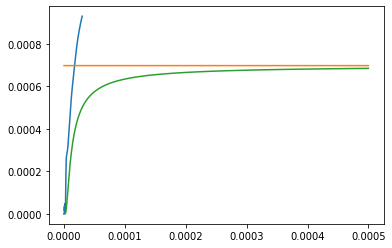

In [9]:
# plotted in earlier plot
plt.plot(wavelengths_test, depths, label='Platon')
plt.plot(new_set, jean_reyleigh, label="Reyleigh Jean")
plt.plot(new_set, blackbody, label="Planck")

x_adjusted = []
for val in x:
    x_adjusted.append(val / (10**5))

plt.scatter(x_adjusted,y, label="Pandexo MIRI")
#plt.errorbar(x_adjusted,y, yerr=e)

plt.legend()
plt.title(f'T planet = {planet_temp}')
plt.xlabel('Wavelength (m)')
plt.ylabel('Eclipse depth (f_planet / f_star)')

plt.show()